In [1]:
!pip install ucimlrepo

# Heart Disease Clustering Analysis: A Complete Tutorial
## Table of Contents
1. Introduction and Concepts
2. Data Preprocessing
3. Clustering Implementation
4. Evaluation and Visualization
5. Results Analysis


In [26]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# Abstract

## What is Clustering?
Clustering is an unsupervised learning technique that groups similar data points together based on their characteristics.
In our heart disease analysis, we'll use clustering to:
- Group patients with similar medical profiles
- Identify potential risk patterns
- Discover natural groupings in medical data

## Key Concepts:
1. **Feature**: A measurable characteristic (e.g., age, blood pressure)
2. **Cluster**: A group of similar data points
3. **Centroid**: The center point of a cluster
4. **Distance Metric**: Method to measure similarity between points

## Algorithms We'll Use:
1. K-means: Divides data into K groups using centroids
2. Hierarchical: Builds a tree of clusters
3. DBSCAN: Groups points based on density
4. Gaussian Mixture Models: Probability-based clustering

Let's start by loading and examining our data:

# 1. Loading and preprocessing data

## Why Preprocess?
Data preprocessing is crucial for clustering because:
1. Features need to be on similar scales
2. Missing values can affect results
3. Outliers might need special handling

## Key Preprocessing Steps:
1. Handle missing values
2. Scale features
3. Handle categorical variables

In [28]:
def load_and_preprocess_data():
    """Load and preprocess the heart disease dataset."""
    # Fetch dataset
    heart_disease = fetch_ucirepo(id=45)
    X = heart_disease.data.features
    y = heart_disease.data.targets

    # Handle missing values
    X_cleaned = X.fillna(X.mean())

    # Scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X_cleaned)
    return pd.DataFrame(scaled_features, columns=X_cleaned.columns), X_cleaned, y


# 2. Clustering Implementation

## 2.1 K-means Clustering

K-means works by:
1. Initializing K centroids
2. Assigning points to nearest centroid
3. Updating centroids
4. Repeating until convergence

First, let's find the optimal number of clusters:

In [29]:
def optimize_kmeans(data, max_k=10):
    """Find optimal number of clusters using elbow method and silhouette analysis."""
    inertias = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Elbow
    ax1.plot(range(2, max_k + 1), inertias, marker='o')
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')

    # Silhouette
    ax2.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')

    plt.tight_layout()
    plt.show()
    return inertias, silhouette_scores


## 2.2 Hierarchical Clustering

Hierarchical clustering creates a tree of clusters. It can be:
- Agglomerative (bottom-up)
- Divisive (top-down)

Let's visualize the cluster hierarchy:

In [30]:
def plot_dendrogram(data):
    """Create and plot hierarchical clustering dendrogram."""
    plt.figure(figsize=(10, 7))
    linkage_matrix = linkage(data, method='ward')
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()


# 3. Evaluation and Visualization

## 3.1 Cluster Evaluation Metrics

We'll use two main metrics:
1. Silhouette Score: Measures cluster cohesion (-1 to 1)
2. Davies-Bouldin Index: Measures cluster separation (lower is better)

In [31]:
def evaluate_clustering(data, labels, method_name):
    """Calculate clustering metrics:
    1. Silhouette Score: Measures cluster cohesion (-1 to 1)
    2. Davies-Bouldin Index: Measures cluster separation (lower is better)
    """
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        print(f"\n{method_name} Evaluation:")
        print(f"Silhouette Score: {silhouette:.3f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

# 3.2 Visualization using PCA and t-SNE

To visualize high-dimensional data, we'll use:
1. PCA: Linear dimensionality reduction
2. t-SNE: Non-linear dimensionality reduction

In [32]:
def visualize_clusters(data, labels, title, method):
    """Visualize clusters using PCA and t-SNE dimensionality reduction."""
    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(data)

    # Create subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot PCA
    scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
    ax1.set_title(f'PCA - {method}')
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')

    # Plot t-SNE
    scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
    ax2.set_title(f't-SNE - {method}')
    ax2.set_xlabel('First t-SNE Component')
    ax2.set_ylabel('Second t-SNE Component')

    plt.colorbar(scatter1, ax=ax1)
    plt.colorbar(scatter2, ax=ax2)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# 4. Results Analysis

Let's analyze the characteristics of each cluster to understand what they represent.

In [33]:
def analyze_clusters(data, labels, method_name):
    """Analyze and visualize characteristics of each cluster."""
    df_with_clusters = pd.DataFrame(data, columns=data.columns)
    df_with_clusters['Cluster'] = labels

    # Calculate mean values for each cluster
    cluster_means = df_with_clusters.groupby('Cluster').mean()

    # Create heatmap of cluster characteristics
    plt.figure(figsize=(12, 6))
    sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Cluster Characteristics - {method_name}')
    plt.show()

    return cluster_means

# Main Function
Now, For the final step... The main function. TaDah!

Finding optimal number of clusters...


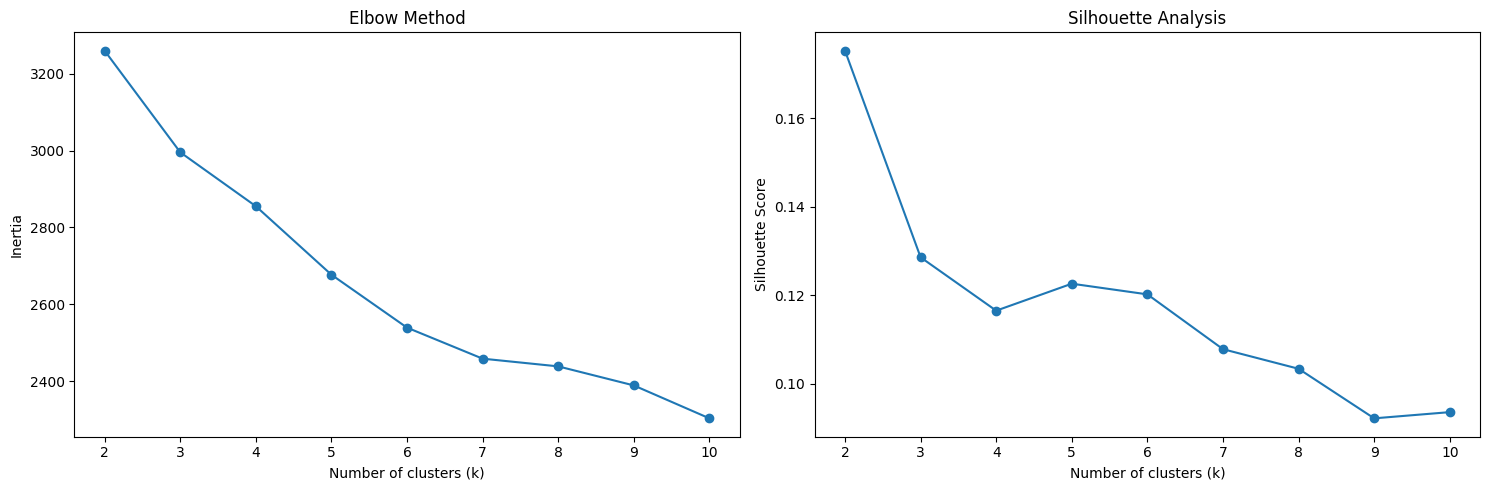


Generating hierarchical clustering dendrogram...


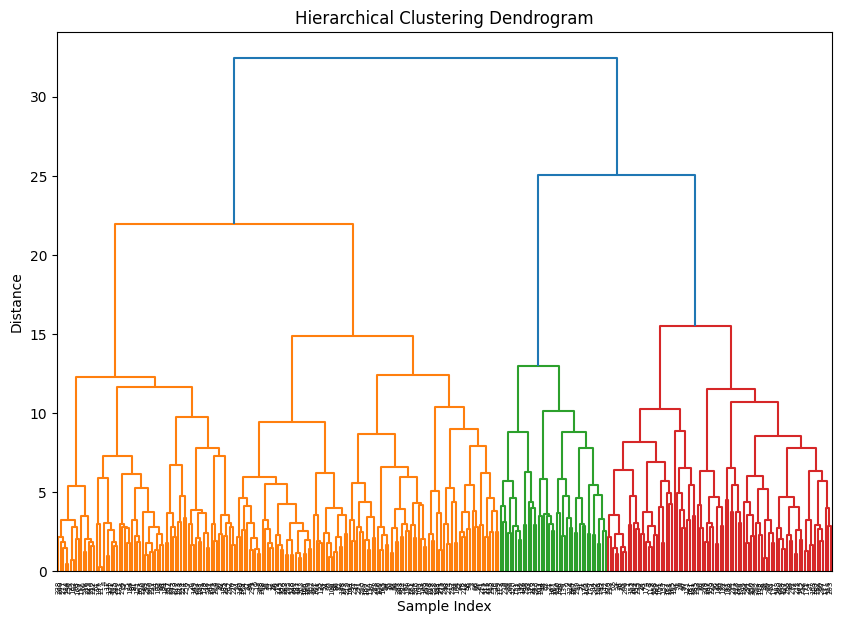


Analyzing K-means clusters:

K-means Evaluation:
Silhouette Score: 0.129
Davies-Bouldin Index: 2.248


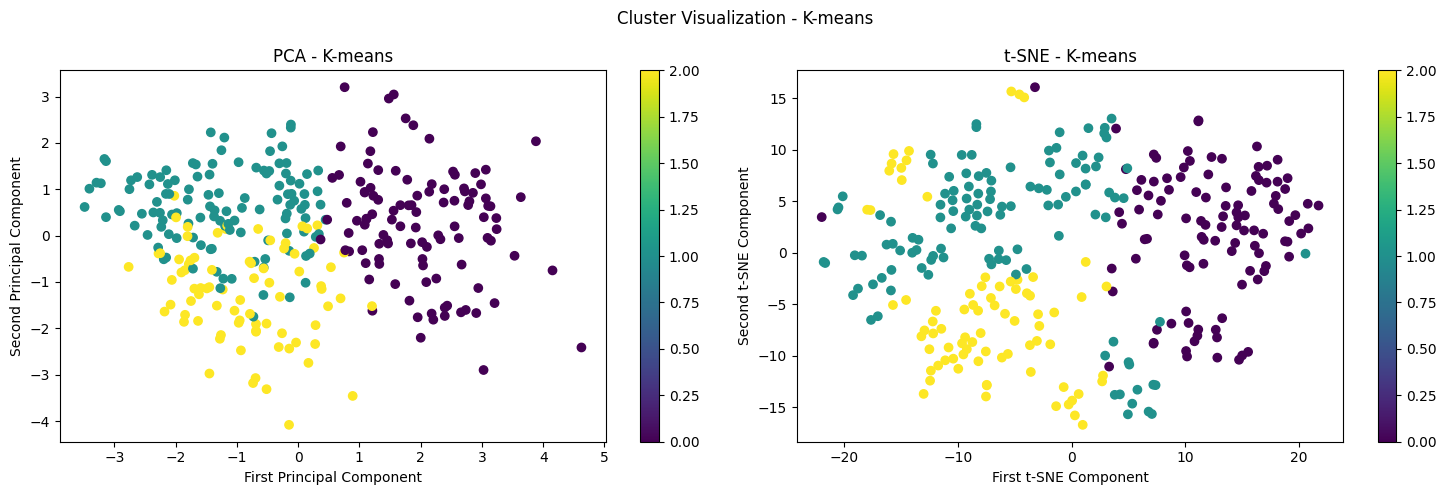

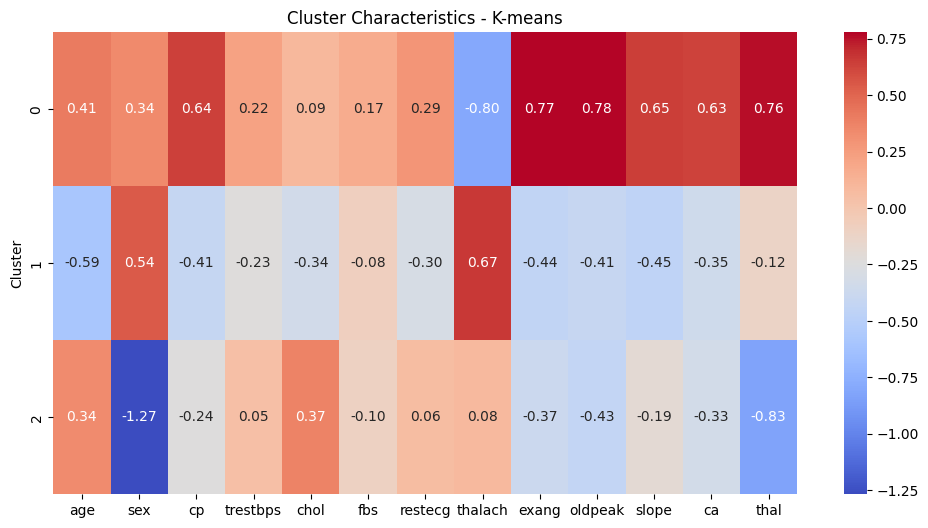


Cluster means:
              age       sex        cp  trestbps      chol       fbs   restecg  \
Cluster                                                                         
0        0.410314  0.342434  0.641777  0.218999  0.093723  0.166003  0.285390   
1       -0.593346  0.540881 -0.412819 -0.228806 -0.335233 -0.083999 -0.297166   
2        0.335716 -1.267366 -0.244502  0.047914  0.374973 -0.097272  0.060940   

          thalach     exang   oldpeak     slope        ca      thal  
Cluster                                                              
0       -0.803211  0.771711  0.778070  0.649113  0.633361  0.757164  
1        0.665114 -0.443668 -0.411413 -0.452897 -0.349200 -0.121352  
2        0.084265 -0.372765 -0.429477 -0.194483 -0.328237 -0.834681  

Analyzing Hierarchical clusters:

Hierarchical Evaluation:
Silhouette Score: 0.162
Davies-Bouldin Index: 2.028


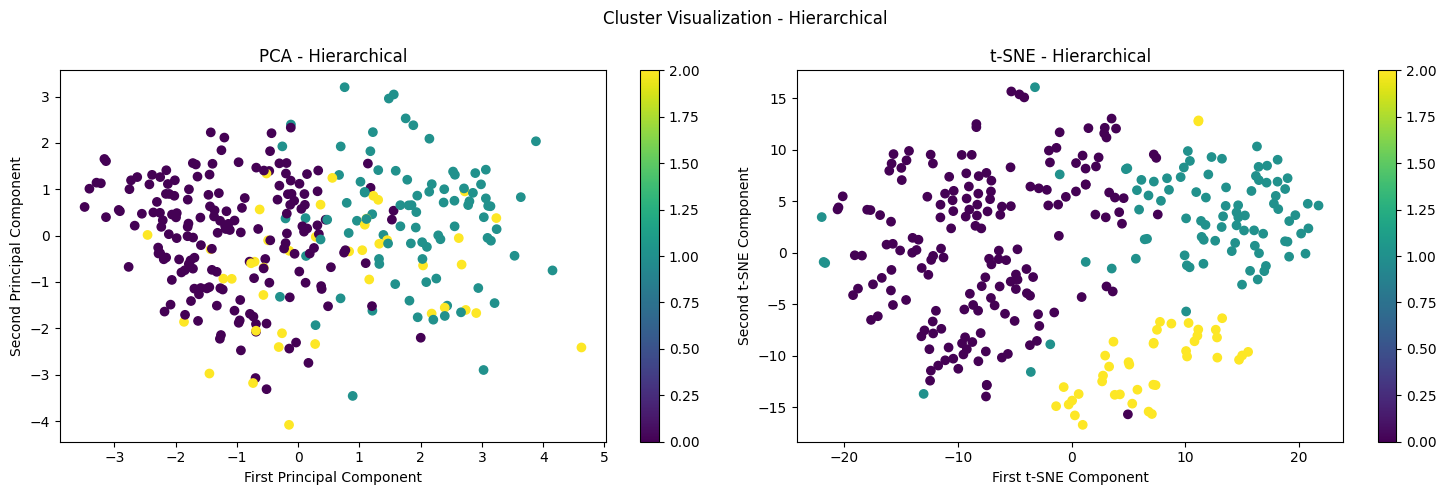

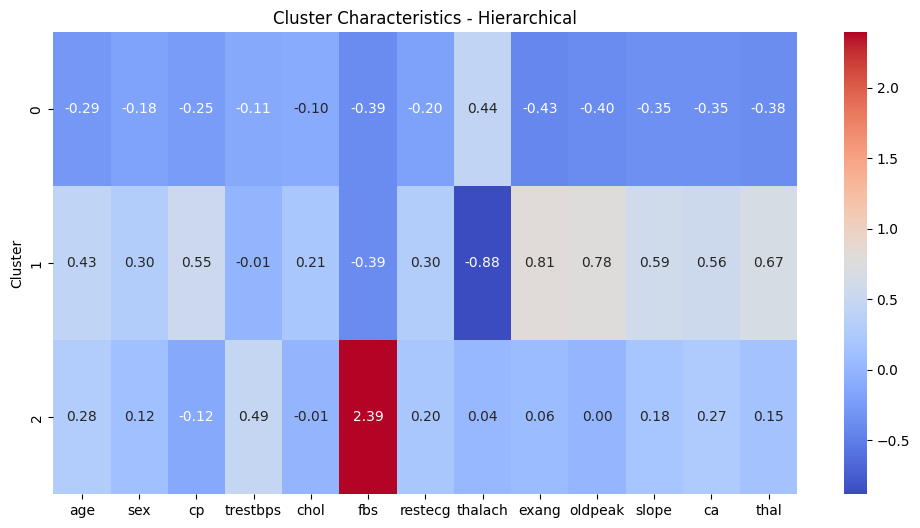


Cluster means:
              age       sex        cp  trestbps      chol       fbs   restecg  \
Cluster                                                                         
0       -0.287576 -0.181109 -0.249693 -0.114593 -0.103538 -0.385125 -0.199523   
1        0.429893  0.296475  0.546041 -0.006273  0.209286 -0.385679  0.295967   
2        0.283813  0.124810 -0.115589  0.485156 -0.012026  2.394438  0.201723   

          thalach     exang   oldpeak     slope        ca      thal  
Cluster                                                              
0        0.439892 -0.425495 -0.395700 -0.346837 -0.349934 -0.378210  
1       -0.882450  0.805539  0.776572  0.593700  0.560350  0.673481  
2        0.037006  0.064838  0.002807  0.184695  0.267328  0.146762  

Analyzing DBSCAN clusters:


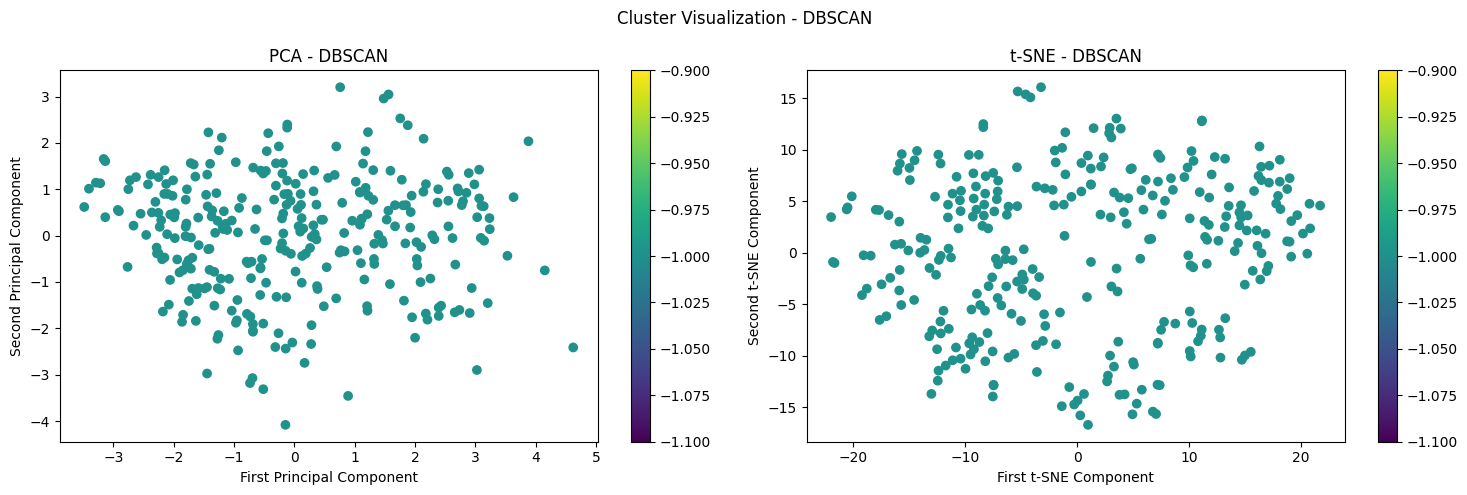

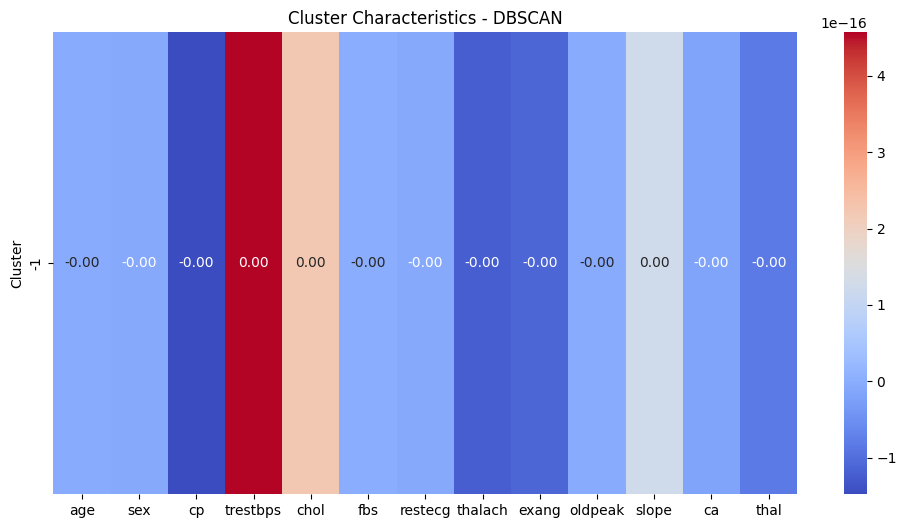


Cluster means:
                  age           sex            cp      trestbps          chol  \
Cluster                                                                         
-1      -5.129743e-18 -6.595384e-18 -1.479381e-16  4.569136e-16  2.213118e-16   

                  fbs       restecg       thalach         exang       oldpeak  \
Cluster                                                                         
-1      -1.282436e-18 -6.595384e-18 -1.231138e-16 -1.121215e-16 -5.129743e-18   

                slope            ca          thal  
Cluster                                            
-1       1.260451e-16 -1.612205e-17 -8.280871e-17  

Analyzing GMM clusters:

GMM Evaluation:
Silhouette Score: 0.085
Davies-Bouldin Index: 2.371


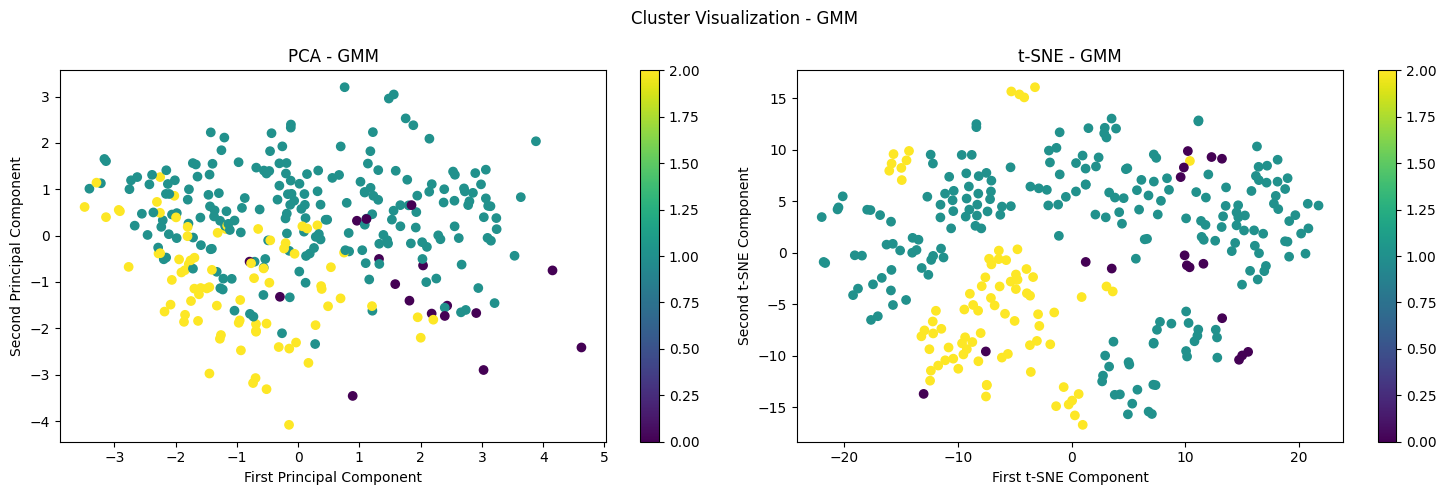

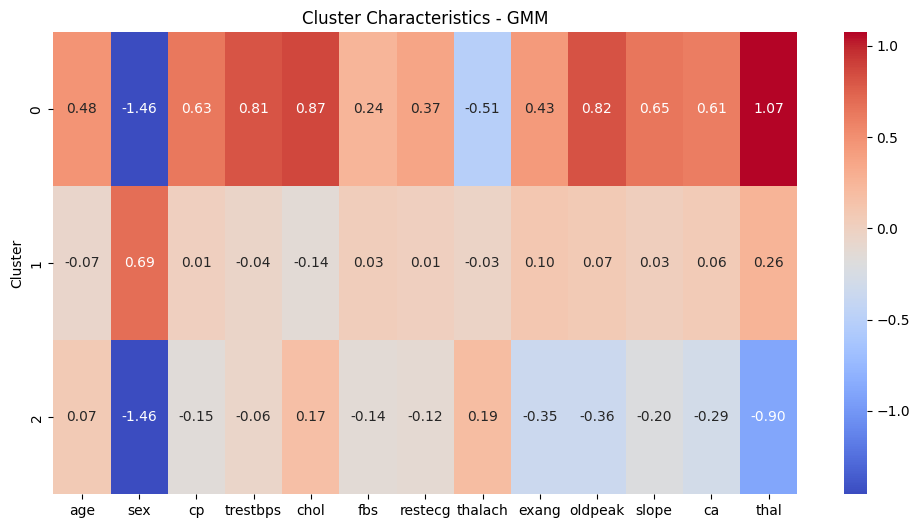


Cluster means:
              age       sex        cp  trestbps      chol       fbs   restecg  \
Cluster                                                                         
0        0.479376 -1.457296  0.632514  0.807742  0.870799  0.244030  0.365279   
1       -0.066934  0.686202  0.006920 -0.044230 -0.137182  0.032843  0.014854   
2        0.070487 -1.457296 -0.152227 -0.057754  0.168199 -0.136427 -0.115872   

          thalach     exang   oldpeak     slope        ca      thal  
Cluster                                                              
0       -0.508261  0.432134  0.823455  0.649113  0.605648  1.074399  
1       -0.033393  0.100324  0.070111  0.025755  0.063742  0.260277  
2        0.193992 -0.350162 -0.355520 -0.204256 -0.292835 -0.898522  


In [34]:
def main():
    """Main function to run the complete clustering analysis."""
    # Load and preprocess data
    scaled_df, X_cleaned, y = load_and_preprocess_data()

    # Optimization
    print("Finding optimal number of clusters...")
    inertias, silhouette_scores = optimize_kmeans(scaled_df)

    # dendrogram plot
    print("\nGenerating hierarchical clustering dendrogram...")
    plot_dendrogram(scaled_df)

    # clustering
    clustering_methods = {
        'K-means': KMeans(n_clusters=3, random_state=42),
        'Hierarchical': AgglomerativeClustering(n_clusters=3),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'GMM': GaussianMixture(n_components=3, random_state=42)
    }

    # Analysis
    for method_name, clusterer in clustering_methods.items():
        print(f"\nAnalyzing {method_name} clusters:")
        labels = clusterer.fit_predict(scaled_df)
        evaluate_clustering(scaled_df, labels, method_name)
        visualize_clusters(scaled_df, labels, f'Cluster Visualization - {method_name}', method_name)
        cluster_means = analyze_clusters(scaled_df, labels, method_name)
        print("\nCluster means:")
        print(cluster_means)

if __name__ == "__main__":
    main()

# 5.Conclusion

Best Performance: K-means

Clear cluster separation in PCA/t-SNE plots
Well-balanced, distinct clusters in heatmap
Ideal for the task at hand,
Computationally efficient and easily interpretable


K-means - combines best cluster definition, interpretability, and efficiency for medical data analysis. The clear three-cluster separation matches the dendrogram validation and provides meaningful patient subgroups for clinical use.